In [1]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/goodvideogames/youtube_comments_esS7sJRZ3nQ.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=esS7sJRZ3nQ,Apex Legends - Before You Buy,2019-02-07T01:43:16Z,@1_mill_subs,So this got randomly shown to me after like 5 ...,2024-05-01T08:15:00Z,0,0
1,https://www.youtube.com/watch?v=esS7sJRZ3nQ,Apex Legends - Before You Buy,2019-02-07T01:43:16Z,@Skyscraper21,"before you buy, a free game ;-)",2023-09-08T19:05:15Z,0,0
2,https://www.youtube.com/watch?v=esS7sJRZ3nQ,Apex Legends - Before You Buy,2019-02-07T01:43:16Z,@stephencarden4133,Bro had a ranger sight on a prowler wow,2023-07-28T23:06:55Z,0,0
3,https://www.youtube.com/watch?v=esS7sJRZ3nQ,Apex Legends - Before You Buy,2019-02-07T01:43:16Z,@stephencarden4133,Sup from 2023,2023-07-28T23:05:55Z,0,0
4,https://www.youtube.com/watch?v=esS7sJRZ3nQ,Apex Legends - Before You Buy,2019-02-07T01:43:16Z,@Eddiemartian659,Ahh I remember season 0 apex lol I miss it.,2023-06-30T04:35:24Z,0,0
...,...,...,...,...,...,...,...,...
5596,https://www.youtube.com/watch?v=esS7sJRZ3nQ,Apex Legends - Before You Buy,2019-02-07T01:43:16Z,@Toyotamw,First,2019-02-07T01:43:55Z,0,0
5597,https://www.youtube.com/watch?v=esS7sJRZ3nQ,Apex Legends - Before You Buy,2019-02-07T01:43:16Z,@thelastword8327,First,2019-02-07T01:43:54Z,0,0
5598,https://www.youtube.com/watch?v=esS7sJRZ3nQ,Apex Legends - Before You Buy,2019-02-07T01:43:16Z,@nilanticepecto1792,First,2019-02-07T01:43:53Z,0,0
5599,https://www.youtube.com/watch?v=esS7sJRZ3nQ,Apex Legends - Before You Buy,2019-02-07T01:43:16Z,@Cer3k,Uno,2019-02-07T01:43:52Z,4,1


In [3]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])
new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
    'good', 'like', 'concord', 'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score',"game", 
    "free", "before", "buy", "play", "apex", "download", "battle", "games", 
    "fortnite", "titanfall", "legends", "royale", "video", "people", "title",
    "would","cool","lol","looked","though","dude","wall",
     "change", "wish", "saw", "prefer", "enough", "fun", "better", "first", "blackout", "another", "back", 
    "bit", "played", "name","version", "mean", "say", "install", "call", "look", 
    "sure", "great", "halo", "gameranx", "try", "wait", "guy", "gon", "stuff", "going", 
    "wraith", "beautiful", "ever", "one", "tho", "right", "lmao", "bro", "fucking", "see", "wut"


])
lmtzr = WordNetLemmatizer()

In [4]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams


In [5]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
413,2019-02-14,The name of the show is “before you buy”. Jake...,name show buy jake know free ffs
414,2019-02-14,"You don't ""Buy"" Apex, it's free.",buy apex free
415,2019-02-14,It seems boring,seems boring
416,2019-02-14,BEFORE YOU BUY(even though its free),buyeven though free
417,2019-02-14,like if it’s better than fortnite and pubg,like better fortnite pubg
...,...,...,...
5596,2019-02-07,First,first
5597,2019-02-07,First,first
5598,2019-02-07,First,first
5599,2019-02-07,Uno,uno


In [6]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=2).reset_index(drop=True)  # Use any integer as the random_state

In [7]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_comments'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df

The video has mostly positive comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2019-02-10,Says ‘before you buy’ in the title...umm what ...,say buy titleumm buying free say download minu...,positive
1,2019-02-07,"It’s free, title should be called “ before you...",free title called install,positive
2,2019-02-07,Wait but you don’t buy the game you take it be...,wait buy game free,positive
3,2019-02-07,"Shit looks fun, I'm in.",shit look fun,negative
4,2019-02-07,I couldn't believe this game is brought you by EA,couldnt believe game brought,neutral
...,...,...,...,...
495,2019-02-10,its free,free,positive
496,2019-02-07,Is it just me but I feel like this game would ...,like game would cool bioshock battle royale li...,positive
497,2019-02-07,*Wraith playing G7 poppin and EVA shotty spray...,wraith poppin eva shotty spraying try hard,negative
498,2019-02-08,"very good game, better than Fortnite",good game better fortnite,positive


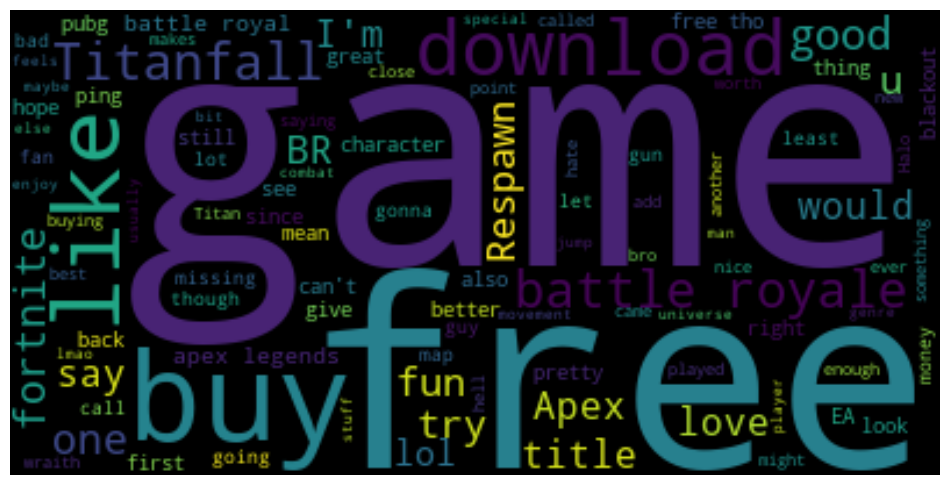

In [8]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

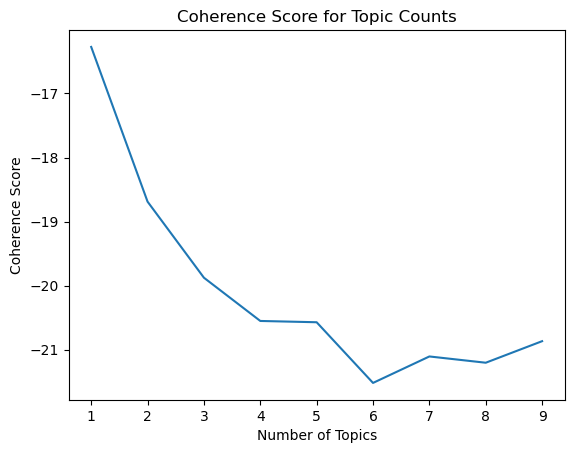

In [9]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [10]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 2
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.007*"love" + 0.005*"pubg" + 0.004*"expensive" + 0.004*"respawn" + 0.003*"still" + 0.003*"isnt" + 0.003*"bloodhound" + 0.003*"add" + 0.003*"amazing" + 0.003*"point"'), (1, '0.011*"legend" + 0.005*"killer" + 0.005*"called" + 0.004*"buying" + 0.004*"pretty" + 0.004*"royal" + 0.004*"give" + 0.004*"best" + 0.003*"least" + 0.003*"came"')]


The coherence score starts declining significantly after 2 topics, which perfectly aligns with the bigrams

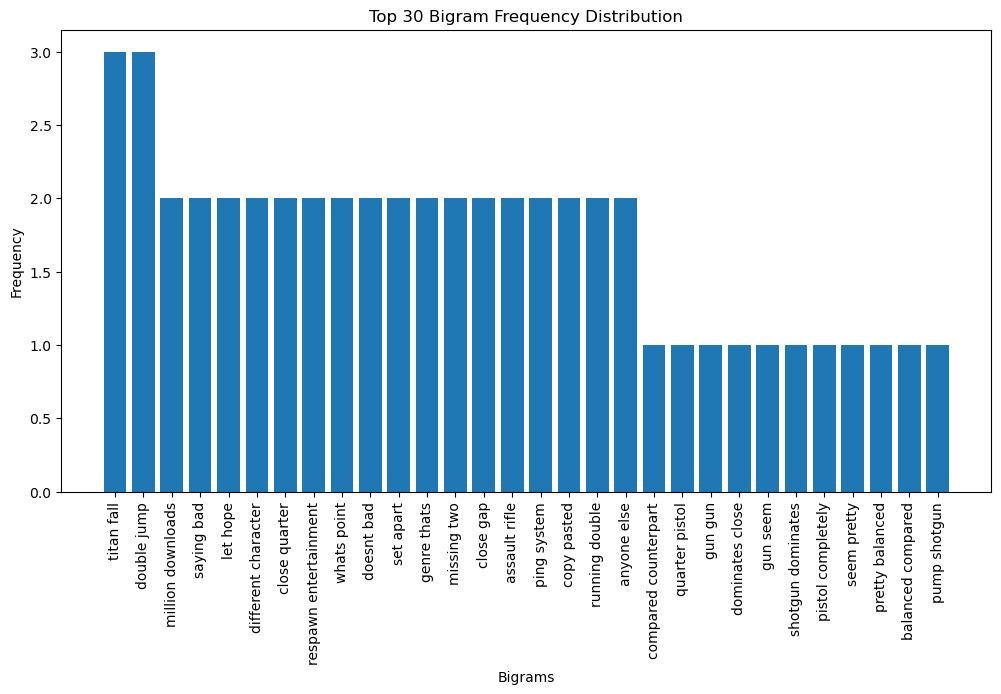

In [12]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [13]:
#Load the existing df_topics CSV file
title=DF['title'].unique()
file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_good_topics.csv'
df_good_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
df_good_topics = pd.concat([df_good_topics, new_row], ignore_index=True)
#Save the updated DataFrame back to the CSV file
df_good_topics.to_csv(file_path, index=False)
df_good_topics

,title,num_topics
0,GTA 5 - Review,3
1,Space Marine 2 - Before You Buy,5
2,Alan Wake 2 - Before You Buy,4
3,Apex Legends - Before You Buy,2
